<a href="https://colab.research.google.com/github/sdhar2020/Visualization-Exploratory-Analysis/blob/master/Investigating_Fandango_Movie_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fandango Online Movie Ratings
Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. A significant discrepancy has been reported between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page.

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

The challenges were conceded to be bugs and has been fixed thereafter.
In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after the initial report.

In [ ]:
import pandas as pd

In [ ]:
fcs= pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv')
mr1617= pd.read_csv('https://raw.githubusercontent.com/mircealex/Movie_ratings_2016_17/master/movie_ratings_16_17.csv')

In [ ]:
fcs.head().transpose()

,0,1,2,3,4
FILM,Avengers: Age of Ultron (2015),Cinderella (2015),Ant-Man (2015),Do You Believe? (2015),Hot Tub Time Machine 2 (2015)
RottenTomatoes,74,85,80,18,14
RottenTomatoes_User,86,80,90,84,28
Metacritic,66,67,64,22,29
Metacritic_User,7.1,7.5,8.1,4.7,3.4
IMDB,7.8,7.1,7.8,5.4,5.1
Fandango_Stars,5,5,5,5,3.5
Fandango_Ratingvalue,4.5,4.5,4.5,4.5,3
RT_norm,3.7,4.25,4,0.9,0.7
RT_user_norm,4.3,4,4.5,4.2,1.4


In [ ]:
mr1617.head().transpose()

,0,1,2,3,4
movie,10 Cloverfield Lane,13 Hours,A Cure for Wellness,A Dog's Purpose,A Hologram for the King
year,2016,2016,2016,2017,2016
metascore,76,48,47,43,58
imdb,7.2,7.3,6.6,5.2,6.1
tmeter,90,50,40,33,70
audience,79,83,47,76,57
fandango,3.5,4.5,3,4.5,3
n_metascore,3.8,2.4,2.35,2.15,2.9
n_imdb,3.6,3.65,3.3,2.6,3.05
n_tmeter,4.5,2.5,2,1.65,3.5


In [ ]:
hickeys = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
df1 = fcs[hickeys]

In [ ]:
new = ['movie', 'year', 'fandango']
df2 = mr1617[new]

In [ ]:
df1['year']= df1['FILM'].str[-5:-1]
df1['movie']= df1['FILM'].str[0:-6]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [ ]:
df2['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [ ]:
sum(df1['Fandango_votes'] < 30)

0

# Our Goal
Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes which is subjective
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions.

# Changing the Goal of our Analysis
At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

# New Research Methodology

With this new research goal, we have two populations of interest:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.
We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more

In [ ]:
fandango_2015 = df1[df1['year'] == '2015'].copy()
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [ ]:
fandango_2016 = df2[df2['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing Distribution Shapes for 2015 and 2016
Our aim is to figure out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about is to analyze and compare the distributions of movie ratings for the two samples.

We'll start with comparing the shape of the two distributions using kernel density plots. We'll use the FiveThirtyEight style for the plots.

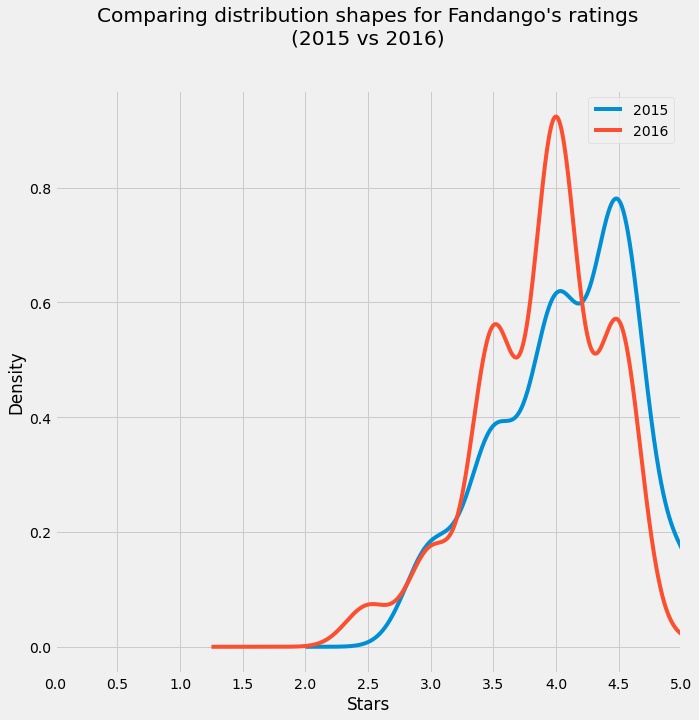

In [ ]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (10,10))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

- Both distributions are strongly left skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
The left skew suggests that movies on Fandango are given mostly high and very high fan ratings.

The ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

# Relative Frequencies

Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead.


In [ ]:
rn2015= fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

In [ ]:
rn2016= fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

In [ ]:
rn2015= pd.DataFrame(rn2015)

In [ ]:
rn2016 = pd.DataFrame(rn2016)

In [ ]:
ratings = rn2016.join(rn2015, lsuffix = '_2016', rsuffix='_2015')

In [ ]:
ratings

,fandango,Fandango_Stars
2.5,3.141361,NaN
3.0,7.329843,8.527132
3.5,24.083770,17.829457
4.0,40.314136,28.682171
4.5,24.607330,37.984496
5.0,0.523560,6.976744


# Determining the Direction of the Change¶
Let's take a couple of summary metrics to get a more precise picture about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.

In [ ]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


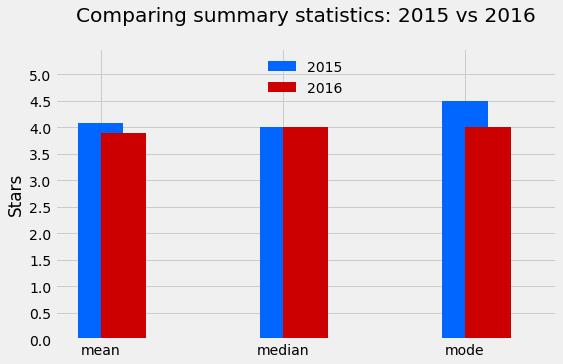

In [ ]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [ ]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.


While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

# Conclusion
Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.